(sentinel-1)=
# Sentinel-1 RTC

## Product description

The Sentinel-1 Radiometric Terrain Corrected (RTC) data product available in the 
SALDi Data Cube (SDC) is a mirror of [Digital Earth Africa](https://www.digitalearthafrica.org/)'s 
product of the same name. 

Detailed information can be found [here](https://registry.opendata.aws/deafrica-sentinel-1/).

The product abbreviation used in this package is `s1_rtc`

## Loading data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sdc.load import load_product

ds = load_product(product="s1_rtc",
                  vec="site06", 
                  time_range=("2021-01-01", "2022-01-01"))
ds

<xarray.Dataset>
Dimensions:      (latitude: 5500, longitude: 6500, time: 211)
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T03:17:55.709725 ... 2021-12...
Data variables:
    vv           (time, latitude, longitude) float32 dask.array<chunksize=(211, 398, 398), meta=np.ndarray>
    vh           (time, latitude, longitude) float32 dask.array<chunksize=(211, 398, 398), meta=np.ndarray>
    area         (time, latitude, longitude) float32 dask.array<chunksize=(211, 398, 398), meta=np.ndarray>

We have now _lazily_ loaded Sentinel-1 RTC data, meaning that the underlying 
data is not yet loaded into memory. What is available, however, is an 
interactive representation of the `xarray.Dataset` object, which can be explored 
to get a better understanding of the data. You can click on different elements 
to expand them and see their content.

The dimensions of the `xarray.Dataset` are `latitude`, `longitude` and `time`. 
The values are by default available in memory and the underlying data can be 
inspected directly, e.g. by indexing the first 10 elements: 

In [2]:
ds.time[0:10]

<xarray.DataArray 'time' (time: 10)>
array(['2021-01-01T03:17:55.709725000', '2021-01-04T16:38:52.312635000',
       '2021-01-06T03:26:29.115495000', '2021-01-06T16:22:38.406752000',
       '2021-01-07T03:18:34.276356000', '2021-01-07T03:18:59.275564000',
       '2021-01-11T16:30:47.414259000', '2021-01-13T03:17:55.169306000',
       '2021-01-16T16:38:51.802111000', '2021-01-18T03:26:28.680483000'],
      dtype='datetime64[ns]')
Coordinates:
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T03:17:55.709725 ... 2021-01...

Having a closer look at one of the bands (`Data variable` in Xarray 
terminology), we get an overview of the data structure and how it has been 
chunked for efficient processing using dask. The example below shows the 
`vh`-band (Vertical-transmit, Horizontal-receive Polarization), which is 
available as an `xarray.DataArray` object. By default, `sdc-tools` has applied 
the chunking along the `time` dimension (notice how it is represented below), 
which is an efficient chunking  strategy for time series analysis.

In [3]:
ds.vh

<xarray.DataArray 'vh' (time: 211, latitude: 5500, longitude: 6500)>
dask.array<vh, shape=(211, 5500, 6500), dtype=float32, chunksize=(211, 398, 398), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T03:17:55.709725 ... 2021-12...

Sometimes it makes sense to assign data to new Python variables, e.g. to make 
the code more readable. Let's assign the `vh` band to a new variable of the 
same name. As you can see, the data structure is still the same.

In [4]:
vh = ds.vh
vh

<xarray.DataArray 'vh' (time: 211, latitude: 5500, longitude: 6500)>
dask.array<vh, shape=(211, 5500, 6500), dtype=float32, chunksize=(211, 398, 398), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T03:17:55.709725 ... 2021-12...

(xarray-shorts-1)=
## Xarray Shorts: Indexing and plotting  

```{note}
Sections with the "Xarray Shorts"-prefix are meant to be practical introductions 
to various Xarray features. They are not product-specific and can be applied to 
other products as well.
```

The [indexing and selecting](https://docs.xarray.dev/en/stable/user-guide/indexing.html#) 
capabilities of Xarray allow for a lot of flexibility in how to access the data. 
In the following example we select a single time step using the `.sel`-method. 
Passing a date string and the `method='nearest'` argument, the nearest time step 
is selected. Looking at the data structure, we can see that it is now a 
2-dimensional `xarray.DataArray` object and that the `time`-dimension has been 
dropped.

In [5]:
vh_scene = vh.sel(time="2021-06-26", method="nearest")
vh_scene

<xarray.DataArray 'vh' (latitude: 5500, longitude: 6500)>
dask.array<getitem, shape=(5500, 6500), dtype=float32, chunksize=(398, 398), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
    time         datetime64[ns] 2021-06-24T03:19:02.433673

We can index in the same way along the `latitude` and `longitude` dimensions 
to select a single pixel. The result is a 1-dimensional `xarray.DataArray` 
object with only the `time`-dimension left.

In [6]:
pt_water = (31.571, -24.981)
pt_veg1 = (31.5384, -25.0226)
pt_veg2 = (31.551, -25.034)

vh_pt_water = vh.sel(longitude=pt_water[0], latitude=pt_water[1], method="nearest")
vh_pt_veg1 = vh.sel(longitude=pt_veg1[0], latitude=pt_veg1[1], method="nearest")
vh_pt_veg2 = vh.sel(longitude=pt_veg2[0], latitude=pt_veg2[1], method="nearest")

vh_pt_veg1

<xarray.DataArray 'vh' (time: 211)>
dask.array<getitem, shape=(211,), dtype=float32, chunksize=(211,), chunktype=numpy.ndarray>
Coordinates:
    latitude     float64 -25.02
    longitude    float64 31.54
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T03:17:55.709725 ... 2021-12...

Let's visualize the time series of the selected pixels. We can use the 
`.plot`-methods of the `xarray.DataArray` object to create different plots using 
the [Matplotlib](https://matplotlib.org/) backend. An overview of different 
types can be found [here](https://docs.xarray.dev/en/stable/api.html#id12), 
where you can also find more information on which arguments can be passed. 

We use the `.plot.scatter`-method to create a scatter plot of the time series. 
The underlying data is automatically loaded into memory to create the plot.

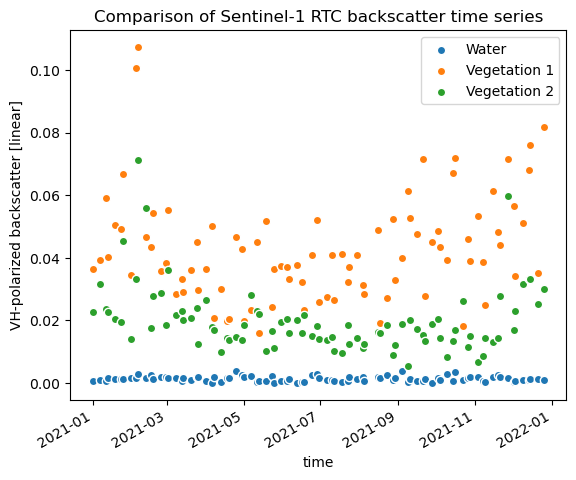

In [7]:
vh_pt_water.plot.scatter(x="time", label="Water")
vh_pt_veg1.plot.scatter(x="time", label="Vegetation 1")
vh_pt_veg2.plot.scatter(x="time", label="Vegetation 2")
plt.title("Comparison of Sentinel-1 RTC backscatter time series")
plt.ylabel("VH-polarized backscatter [linear]")
plt.legend()

## Converting to decibel scale

With Synthetic Aperture Radar (SAR) data, it is often useful to convert the data 
to decibels (dB) to make it more interpretable, especially for visualization 
purposes. Just be careful if you want to apply further mathematical operations 
on the data, as they are not equivalent to operations on data that is linearly 
scaled. 

The Sentinel-1 RTC data is stored in linear units (amplitude), but we can use 
numpy's [`log10`-method](https://numpy.org/doc/stable/reference/generated/numpy.log10.html#numpy.log10) 
and multiply the result by `10` to convert the data to dB.

In [8]:
vh_db = 10 * np.log10(vh)
vh_db

<xarray.DataArray 'vh' (time: 211, latitude: 5500, longitude: 6500)>
dask.array<mul, shape=(211, 5500, 6500), dtype=float32, chunksize=(211, 398, 398), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T03:17:55.709725 ... 2021-12...

Yet again, notice how the data structure above is still the same as for the 
`vh`-band we started with and that the data is still lazily loaded. The only 
difference is the increase of graph layers in the row called "Dask graph". Dask 
is constructing a graph behind the scenes, which is a representation of the 
computation that will be executed once the data is loaded into memory. 

To see the difference between the linear and the dB data, let's plot the time 
series again. In terms of analysing the data, we will not go any further in this 
notebook.

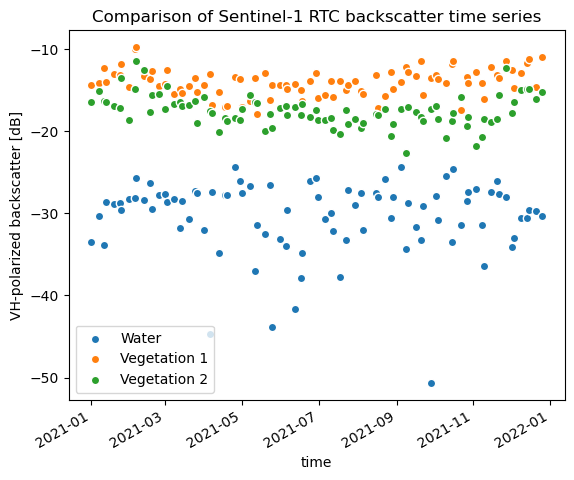

In [9]:
vh_db_pt_water = vh_db.sel(longitude=pt_water[0], latitude=pt_water[1], method="nearest")
vh_db_pt_veg1 = vh_db.sel(longitude=pt_veg1[0], latitude=pt_veg1[1], method="nearest")
vh_db_pt_veg2 = vh_db.sel(longitude=pt_veg2[0], latitude=pt_veg2[1], method="nearest")

vh_db_pt_water.plot.scatter(x="time", label="Water")
vh_db_pt_veg1.plot.scatter(x="time", label="Vegetation 1")
vh_db_pt_veg2.plot.scatter(x="time", label="Vegetation 2")
plt.title("Comparison of Sentinel-1 RTC backscatter time series")
plt.ylabel("VH-polarized backscatter [dB]")
plt.legend()

(xarray-shorts-2)=
## Xarray Shorts: Groupby-operations

Combining [`groupby`-operations](https://docs.xarray.dev/en/stable/user-guide/groupby.html) 
with aggregation functions can be very useful to calculate statistics for 
different time periods. In the following example, we calculate the median for 
each month of the year.

Let's first just apply the groupby-operation. The result is a `xarray.core.groupby.DataArrayGroupBy`
object, which is a lazy representation of the grouped data.

In [10]:
vh_db_monthly = vh_db.groupby("time.month")
vh_db_monthly

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

```{tip}
Handling Xarray's datetime components as in the example above can be very useful. 
You can find an overview on this topic [here](https://docs.xarray.dev/en/stable/user-guide/time-series.html#datetime-components).
```

We can now apply an aggregation function to the grouped data. In this case, we 
calculate the median for each month of the year. The result is a 
`xarray.DataArray` object with a new `month`-dimension. 

Notice that the size of the array is now much smaller than the original `vh` 
data we started with because we have reduced the number of time steps from 211 
(acquisitions) to 12 (months). The size is an estimate of the potential memory 
footprint of the data.

In [11]:
vh_db_monthly_median = vh_db_monthly.median(dim="time")
vh_db_monthly_median

<xarray.DataArray 'vh' (month: 12, latitude: 5500, longitude: 6500)>
dask.array<stack, shape=(12, 5500, 6500), dtype=float32, chunksize=(1, 398, 398), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

We could have also chained both operations together, which would have resulted 
in the same output:
```python
vh_db_monthly_median = vh_db.groupby("time.month").median(dim="time")
```

You can find an overview of which methods are available for grouped 
`DataArrayGroupBy` objects [here](https://docs.xarray.dev/en/stable/api.html#id14).



As you can probably imagine, these operations can be very useful to handle and 
analyse large time series data. Instead of going further at this point, let's 
just select the month of June and plot it. 

Text(0.5, 1.0, 'Median VH-polarized backscatter for June 2021; SALDi site 06')

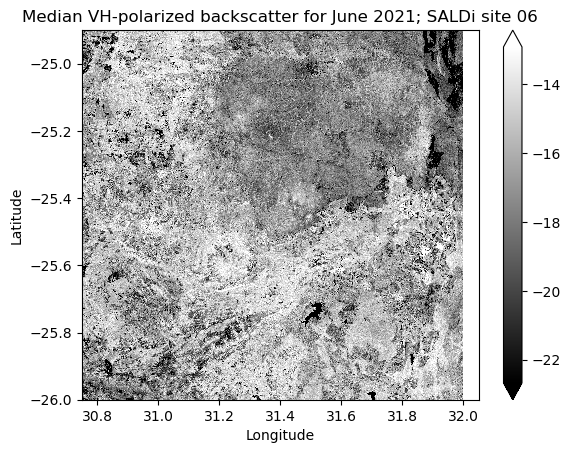

In [12]:
vh_db_monthly_median.sel(month=6).plot(robust=True, add_labels=False, cmap="gray")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Median VH-polarized backscatter for June 2021; SALDi site 06")

```{tip}
The `robust=True` argument clips the color scale to the 2nd and 98th 
percentiles.
```